# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

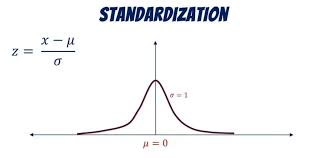


In [1]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation

import numpy as np
import pandas as pd

# Load the data from CSV file
df = pd.read_csv('data.csv', index_col=0)
print(f"Original data shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")

# Identify non-numeric columns for encoding
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nNon-numeric columns found: {non_numeric_cols}")

# Handle categorical variables by label encoding
for col in non_numeric_cols:
    # Map unique values to numeric codes
    unique_values = df[col].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    df[col] = df[col].map(mapping)
    
print(f"\nEncoded non-numeric columns. DataFrame shape: {df.shape}")

# Handle missing values through mean imputation
numeric_df = df.fillna(df.mean())
print(f"Missing values after imputation: {numeric_df.isnull().sum().sum()}")

# Remove any remaining rows with NaNs (if any column has all NaNs)
numeric_df = numeric_df.dropna(axis=1, how='all')
print(f"Shape after removing empty columns: {numeric_df.shape}")

# Standardize the data manually using numpy: (X - mean) / std
data_array = numeric_df.values.astype(float)
data_mean = np.mean(data_array, axis=0)
data_std = np.std(data_array, axis=0)

# Avoid division by zero
data_std[data_std == 0] = 1

# Standardization formula: (Data - Data Mean) / Data's Standard Deviation
standardized_data = (data_array - data_mean) / data_std

print(f"\nStandardized data shape: {standardized_data.shape}")
print(f"Mean of standardized data (should be ~0): {np.mean(standardized_data, axis=0)[:5]}")
print(f"Std of standardized data (should be ~1): {np.std(standardized_data, axis=0)[:5]}")

standardized_data[:5]  # Display the first few rows of standardized data

C:\Users\ARIIK\AppData\Local\Temp\ipykernel_16088\3581105713.py:8: DtypeWarning: Columns (403,405,832,833,841,844,857,915,916,928,929,941,942,954,955,957,958,967,968,970,971,980,981,993,994,996,997,1006,1007,1009,1010,1022,1023,1035,1036,1048,1049,1071,1072,1084,1085,1087,1088,1097,1098,1100,1101,1110,1111,1113,1114,1126,1127,1139,1140,1149,1150,1152,1153,1162,1163,1165,1166,1178,1179,1191,1192,1204,1205,1217,1218,1227,1228,1230,1231,1240,1241,1243,1244,1256,1257,1269,1270,1282,1283,1295,1296,1306,1308,1309,1319,1321,1322,1335,1347,1348,1373,1374,1386,1387,1399,1400,1412,1413,1451,1452,1453,1480,1481,1482,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1654,1669,1704,1732,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1746,1747,1748,1749,1750,1751,1752,1753) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', index_col=0)


Original data shape: (9597, 1753)
Total missing values: 10521071

Non-numeric columns found: ['adm0', 'adm1', 'adm2', 'hhrelig', 'hhtribe', 'plotunits', 'seas1nam', 'seas2nam', 'season1e', 'season1s', 'season2e', 'season2s', 'subs1tot', 'subs2tot', 'tib', 'tie', 's1p1c1plant', 's1p1c1harv', 's1p1c1seed', 's1p1c1sval', 's1p1c2plant', 's1p1c2harv', 's1p1c2seed', 's1p1c2sval', 's1p1c3plant', 's1p1c3harv', 's1p1c3seed', 's1p1c3sval', 's1p1c4plant', 's1p1c4harv', 's1p1c4seed', 's1p1c4sval', 's1p1c5plant', 's1p1c5harv', 's1p1c5seed', 's1p1c5sval', 's1p1c6plant', 's1p1c6harv', 's1p1c6seed', 's1p1c6sval', 's1p2c1plant', 's1p2c1harv', 's1p2c1seed', 's1p2c1sval', 's1p2c2plant', 's1p2c2harv', 's1p2c2seed', 's1p2c2sval', 's1p2c3plant', 's1p2c3harv', 's1p2c4plant', 's1p2c4harv', 's1p2c5plant', 's1p2c5harv', 's1p2c6plant', 's1p2c6harv', 's2p1c1plant', 's2p1c1harv', 's2p1c1seed', 's2p1c1sval', 's2p1c2plant', 's2p1c2harv', 's2p1c2seed', 's2p1c2sval', 's2p1c3plant', 's2p1c3harv', 's2p1c3seed', 's2p1c3s

array([[-1.42705379, -0.30079413,  0.54699561, ..., -0.03561974,
        -1.64815731, -0.58193074],
       [-1.42705375, -0.30079413,  0.54699561, ..., -0.03561974,
        -1.64815731, -0.58193074],
       [-1.42705372,  3.62604196, -2.04534048, ..., -0.03561974,
        -1.64815731, -0.58193074],
       [-1.42705368,  3.62604196,  0.54699561, ..., -0.03561974,
        -1.64815731, -0.58193074],
       [-1.42705365, -0.30079413,  0.54699561, ..., -0.03561974,
        -1.64815731, -0.58193074]], shape=(5, 1708))

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = None  # Calculate covariance matrix

# The covariance matrix shows how variables vary together
# Formula: Cov(X) = (X^T * X) / (n - 1), where X is centered data

# Since we already standardized, we can calculate directly
n_samples = standardized_data.shape[0]

# Calculate covariance matrix using numpy
# For standardized data: Cov = (X^T @ X) / (n - 1)
cov_matrix = np.cov(standardized_data.T)

print(f"Covariance Matrix Shape: {cov_matrix.shape}")
print(f"First 5x5 of covariance matrix:")
print(cov_matrix[:5, :5])

cov_matrix

Covariance Matrix Shape: (1708, 1708)
First 5x5 of covariance matrix:
[[ 1.00010421  0.17389951 -0.04915655  0.01951253  0.0340072 ]
 [ 0.17389951  1.00010421 -0.23147921  0.02276834  0.01519635]
 [-0.04915655 -0.23147921  1.00010421  0.05843059 -0.04719851]
 [ 0.01951253  0.02276834  0.05843059  1.00010421  0.120835  ]
 [ 0.0340072   0.01519635 -0.04719851  0.120835    1.00010421]]


array([[ 1.00010421e+00,  1.73899507e-01, -4.91565466e-02, ...,
        -2.83896127e-02,  7.99732697e-01,  3.79137152e-01],
       [ 1.73899507e-01,  1.00010421e+00, -2.31479207e-01, ...,
        -2.28095529e-17,  1.22182064e-01,  1.36129181e-01],
       [-4.91565466e-02, -2.31479207e-01,  1.00010421e+00, ...,
        -1.80197203e-18, -4.89986098e-02, -1.42024479e-02],
       ...,
       [-2.83896127e-02, -2.28095529e-17, -1.80197203e-18, ...,
         1.00010421e+00, -8.69907495e-03, -1.19061320e-02],
       [ 7.99732697e-01,  1.22182064e-01, -4.89986098e-02, ...,
        -8.69907495e-03,  1.00010421e+00,  4.30479946e-01],
       [ 3.79137152e-01,  1.36129181e-01, -1.42024479e-02, ...,
        -1.19061320e-02,  4.30479946e-01,  1.00010421e+00]],
      shape=(1708, 1708))

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [4]:
# Step 4: Perform Eigendecomposition
# eigenvalues, eigenvectors = None  # Perform eigendecomposition

# Eigendecomposition extracts eigenvalues and eigenvectors from covariance matrix
# These represent the variance explained and the directions of maximum variance

# Use numpy's eig function for eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Eigenvalues shape: {eigenvalues.shape}")
print(f"Eigenvectors shape: {eigenvectors.shape}")
print(f"\nFirst 10 eigenvalues (largest first will be shown in next step):")
print(f"Min eigenvalue: {eigenvalues.min():.6f}")
print(f"Max eigenvalue: {eigenvalues.max():.6f}")
print(f"Sum of eigenvalues: {eigenvalues.sum():.2f}")

eigenvalues, eigenvectors

Eigenvalues shape: (1708,)
Eigenvectors shape: (1708, 1708)

First 10 eigenvalues (largest first will be shown in next step):
Min eigenvalue: -0.000000+0.000000j
Max eigenvalue: 67.279112+0.000000j
Sum of eigenvalues: 1616.17+0.00j


(array([67.27911166+0.j, 45.01197108+0.j, 41.04327546+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j], shape=(1708,)),
 array([[-0.06868765+0.j, -0.00767497+0.j,  0.01394597+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.00407554+0.j, -0.00072586+0.j,  0.00670924+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.00716119+0.j,  0.00013044+0.j, -0.00688448+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        ...,
        [ 0.00668508+0.j,  0.00077657+0.j, -0.0115729 +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.0411706 +0.j, -0.00746842+0.j,  0.01027054+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.01125257+0.j, -0.00180096+0.j,  0.01753943+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j]],
       shape=(1708, 1708)))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [5]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly

# We want to keep the eigenvectors that correspond to the LARGEST eigenvalues
# These represent the directions with maximum variance

# Convert eigenvalues to real (remove imaginary component from numerical errors)
eigenvalues_real = np.real(eigenvalues)

# Sort indices in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues_real)[::-1]  # [::-1] reverses for descending order

# Sort eigenvalues
sorted_eigenvalues = eigenvalues_real[sorted_indices]

# Sort eigenvectors accordingly
sorted_eigenvectors = np.real(eigenvectors[:, sorted_indices])

print(f"Top 10 sorted eigenvalues (explain variance):")
print(sorted_eigenvalues[:10])

# Calculate explained variance ratio
total_variance = sorted_eigenvalues.sum()
explained_variance_ratio = sorted_eigenvalues / total_variance

print(f"\nExplained Variance Ratio for first 10 components:")
for i in range(10):
    cumulative = explained_variance_ratio[:i+1].sum()
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} (Cumulative: {cumulative:.4f})")

sorted_eigenvectors

Top 10 sorted eigenvalues (explain variance):
[67.27911166 45.01197108 41.04327546 32.09613109 27.15180093 23.34779606
 20.60776826 19.51006152 17.39121738 16.25439033]

Explained Variance Ratio for first 10 components:
PC1: 0.0416 (Cumulative: 0.0416)
PC2: 0.0279 (Cumulative: 0.0695)
PC3: 0.0254 (Cumulative: 0.0949)
PC4: 0.0199 (Cumulative: 0.1147)
PC5: 0.0168 (Cumulative: 0.1315)
PC6: 0.0144 (Cumulative: 0.1460)
PC7: 0.0128 (Cumulative: 0.1587)
PC8: 0.0121 (Cumulative: 0.1708)
PC9: 0.0108 (Cumulative: 0.1816)
PC10: 0.0101 (Cumulative: 0.1916)


array([[-6.86876514e-02, -7.67497198e-03,  1.39459679e-02, ...,
        -4.50226311e-09, -1.57082653e-09, -3.54299903e-09],
       [-4.07554240e-03, -7.25859767e-04,  6.70923521e-03, ...,
         6.11233881e-14, -8.53356877e-13, -7.20375690e-14],
       [ 7.16119317e-03,  1.30437695e-04, -6.88447987e-03, ...,
        -1.25913292e-12,  1.04136598e-12, -3.63054365e-13],
       ...,
       [ 6.68507608e-03,  7.76565468e-04, -1.15728956e-02, ...,
         2.60260862e-13,  4.28342874e-13,  1.26485384e-13],
       [-4.11706023e-02, -7.46842214e-03,  1.02705448e-02, ...,
         1.24647782e-11,  1.75533982e-11,  6.64543259e-12],
       [-1.12525709e-02, -1.80096318e-03,  1.75394325e-02, ...,
        -4.46179243e-12, -3.79813311e-12, -2.07946115e-12]],
      shape=(1708, 1708))

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [6]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components

# We'll dynamically select components based on cumulative explained variance threshold

# Calculate cumulative explained variance
cumsum_variance = np.cumsum(explained_variance_ratio)

# Select components that explain at least 90% of variance
variance_threshold = 0.90
num_components = np.argmax(cumsum_variance >= variance_threshold) + 1

print(f"Number of components needed for {variance_threshold*100}% variance: {num_components}")
print(f"Cumulative variance explained by {num_components} components: {cumsum_variance[num_components-1]:.4f}")

# Select the top eigenvectors (principal components)
principal_components = sorted_eigenvectors[:, :num_components]

print(f"\nPrincipal Components shape: {principal_components.shape}")
print(f"(1708 features projected onto {num_components} principal components)")

# Project standardized data onto principal components
# Formula: reduced_data = standardized_data @ principal_components
reduced_data = standardized_data @ principal_components

print(f"\nReduced data shape: {reduced_data.shape}")
print(f"First 5 samples projected onto PCs:")

reduced_data[:5]

Number of components needed for 90.0% variance: 627
Cumulative variance explained by 627 components: 0.9000

Principal Components shape: (1708, 627)
(1708 features projected onto 627 principal components)

Reduced data shape: (9597, 627)
First 5 samples projected onto PCs:


array([[ 2.1520631 , -0.32254488,  5.81640764, ..., -0.07902259,
         0.61550004,  0.43081822],
       [ 0.92172434, -0.54166708,  6.0417537 , ..., -0.81269322,
        -1.11911491, -2.17328773],
       [ 4.92459747, -0.09078652,  4.16135009, ..., -0.42422463,
         0.2146087 ,  1.05234508],
       [ 4.66533516, -0.07056973,  4.55281846, ...,  0.89079659,
        -0.99551727,  0.09166706],
       [ 1.74781393, -0.38963435,  4.40231145, ..., -0.03903717,
        -1.21815274, -1.96090873]], shape=(5, 627))

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [7]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(f'Original standardized data shape was: {standardized_data.shape}')
print(f'We successfully reduced from 1708 features to {num_components} dimensions')
print(f'Dimensionality reduction: {(1 - num_components/1708)*100:.1f}% reduction')

print(f'\nVariance explained by each component (first 10):')
for i in range(min(10, num_components)):
    print(f'  PC{i+1}: {explained_variance_ratio[i]*100:.2f}%')

print(f'\nFirst 5 rows of reduced data:')
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (9597, 627)
Original standardized data shape was: (9597, 1708)
We successfully reduced from 1708 features to 627 dimensions
Dimensionality reduction: 63.3% reduction

Variance explained by each component (first 10):
  PC1: 4.16%
  PC2: 2.79%
  PC3: 2.54%
  PC4: 1.99%
  PC5: 1.68%
  PC6: 1.44%
  PC7: 1.28%
  PC8: 1.21%
  PC9: 1.08%
  PC10: 1.01%

First 5 rows of reduced data:


array([[ 2.1520631 , -0.32254488,  5.81640764, ..., -0.07902259,
         0.61550004,  0.43081822],
       [ 0.92172434, -0.54166708,  6.0417537 , ..., -0.81269322,
        -1.11911491, -2.17328773],
       [ 4.92459747, -0.09078652,  4.16135009, ..., -0.42422463,
         0.2146087 ,  1.05234508],
       [ 4.66533516, -0.07056973,  4.55281846, ...,  0.89079659,
        -0.99551727,  0.09166706],
       [ 1.74781393, -0.38963435,  4.40231145, ..., -0.03903717,
        -1.21815274, -1.96090873]], shape=(5, 627))

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

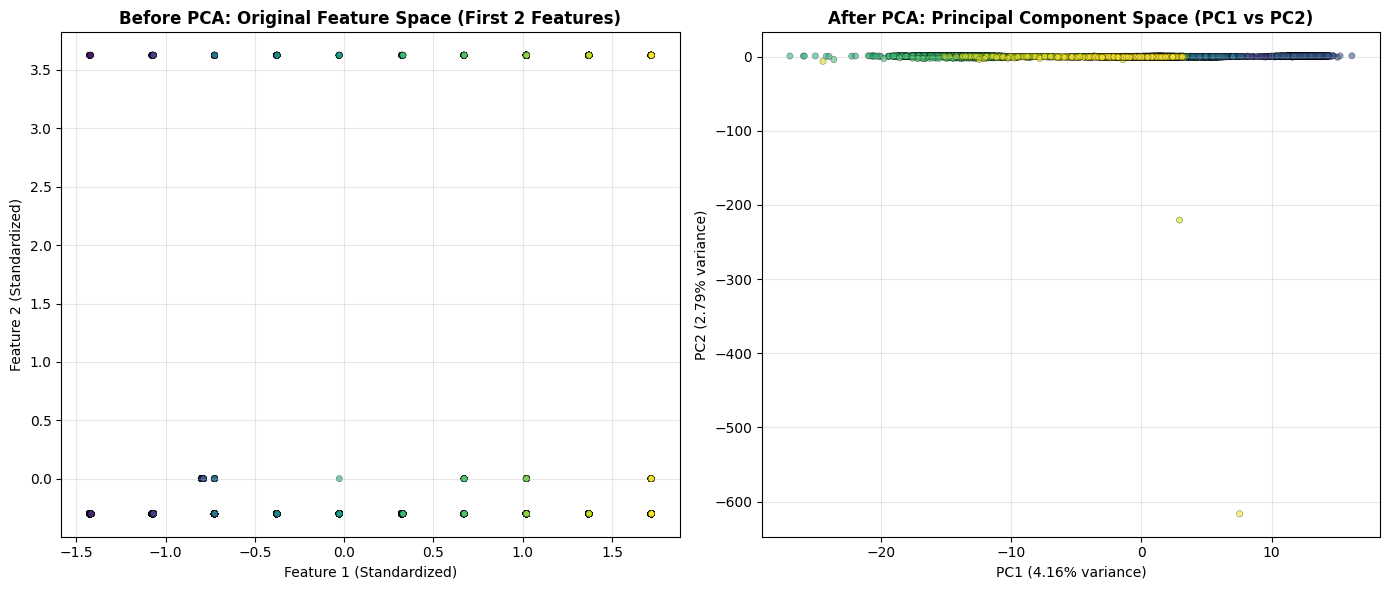

Quick interpretation:
- Left plot shows data in original feature axes (standardized).
- Right plot shows the same data rotated into PC1/PC2, where variance is maximized.


In [8]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Plot original data (first two features for simplicity)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    standardized_data[:, 0],
    standardized_data[:, 1],
    s=20,
    alpha=0.6,
    c=np.arange(standardized_data.shape[0]),
    cmap="viridis",
    edgecolors="black",
    linewidth=0.3,
)
plt.title("Before PCA: Original Feature Space (First 2 Features)", fontweight="bold")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(alpha=0.3)

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    s=20,
    alpha=0.6,
    c=np.arange(reduced_data.shape[0]),
    cmap="viridis",
    edgecolors="black",
    linewidth=0.3,
)
plt.title("After PCA: Principal Component Space (PC1 vs PC2)", fontweight="bold")
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% variance)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Quick interpretation:")
print("- Left plot shows data in original feature axes (standardized).")
print("- Right plot shows the same data rotated into PC1/PC2, where variance is maximized.")